In [1]:
import numpy as np
import pandas as pd
from zipfile import ZipFile
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import _pickle as cPickle
import bz2

# Removing scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Import data

For compressing and extracting files

In [2]:
def compressed_pickle(title, data):
    with bz2.BZ2File('./data/output/' + title + '.pbz2', 'w') as f:
        cPickle.dump(data, f)
        
def decompress_pickle(file):
    data = bz2.BZ2File(file, 'rb')
    data = cPickle.load(data)
    return data

May take a while to run

In [3]:
hour_trips_dict = decompress_pickle('./data/output/bixi_data_2016_2017_2018.pbz2')
_2019_data = decompress_pickle('./data/output/bixi_data_2019.pbz2')

# Process training data

In [4]:
train_group_data = {}

with tqdm(total=len(hour_trips_dict)) as pbar:
    for station_code in hour_trips_dict:
        df = hour_trips_dict[station_code]
        X_train = df[['Temp (°C)', 'Dew Point Temp (°C)', 'Rel Hum (%)', 'Wind Dir (10s deg)',
                      'Wind Spd (km/h)', 'Visibility (km)', 'Stn Press (kPa)', 'Month', 'Hour', 'Day_of_year',
                      'Blowing Snow', 'Clear', 'Cloudy', 'Drizzle', 'Fog', 'Heavy Rain', 'Ice Pellets', 
                      'Mainly Clear', 'Moderate Rain', 'Moderate Rain Showers', 'Mostly Cloudy', 'Rain',
                      'Rain Showers', 'Snow', 'Snow Showers', 'Thunderstorms', 'Haze', 'Heavy Rain Showers', 
                      'Moderate Drizzle', 'Blowing Dust', 'Freezing Drizzle', 'Freezing Rain', 'Smoke', 
                      'Snow Grains', 'Moderate Snow'
                      ]]
        y_train = df[['hour_trip_count']]

        train_group_data[station_code] = {
            "X_train": X_train,
            "y_train": y_train
        }
        pbar.update(1)

100%|██████████| 463/463 [00:01<00:00, 313.79it/s]


# Process test and validation data

In [5]:
from sklearn.model_selection import train_test_split

test_validation_group_data = {}

with tqdm(total=len(_2019_data)) as pbar:
    for station_code in _2019_data:
        df = _2019_data[station_code]
        
        X_tv = df[['Temp (°C)', 'Dew Point Temp (°C)', 'Rel Hum (%)', 'Wind Dir (10s deg)',
                      'Wind Spd (km/h)', 'Visibility (km)', 'Stn Press (kPa)', 'Month', 'Hour', 'Day_of_year',
                      'Blowing Snow', 'Clear', 'Cloudy', 'Drizzle', 'Fog', 'Heavy Rain', 'Ice Pellets', 
                      'Mainly Clear', 'Moderate Rain', 'Moderate Rain Showers', 'Mostly Cloudy', 'Rain',
                      'Rain Showers', 'Snow', 'Snow Showers', 'Thunderstorms', 'Haze', 'Heavy Rain Showers', 
                      'Moderate Drizzle', 'Blowing Dust', 'Freezing Drizzle', 'Freezing Rain', 'Smoke', 
                      'Snow Grains', 'Moderate Snow']]
        y_tv = df[['hour_trip_count']]

        X_test, X_val, y_test, y_val = train_test_split(X_tv, y_tv, test_size=0.5, random_state=0)
        
        test_validation_group_data[station_code] = {
            "X_test": X_test,
            "y_test": y_test,
            "X_val": X_val,
            "y_val": y_val
        }
        pbar.update(1)

100%|██████████| 463/463 [00:02<00:00, 205.98it/s]


In [8]:
train_group_data[6100]['X_train']

,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Month,Hour,Day_of_year,...,Thunderstorms,Haze,Heavy Rain Showers,Moderate Drizzle,Blowing Dust,Freezing Drizzle,Freezing Rain,Smoke,Snow Grains,Moderate Snow
0,0.800,-6.800,57.000,2.000,14.000,24.100,102.780,4,2,106,...,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.500,-6.000,62.000,2.000,17.000,24.100,102.780,4,3,106,...,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,0.400,-5.200,66.000,2.000,21.000,24.100,102.820,4,4,106,...,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,-0.300,-5.500,68.000,2.000,18.000,48.300,102.850,4,5,106,...,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,0.200,-5.800,64.000,2.000,21.000,48.300,102.930,4,6,106,...,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,4.200,3.700,97.000,35.000,11.000,4.800,100.460,10,19,304,...,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4905,3.500,3.000,97.000,35.000,10.000,4.800,100.470,10,20,304,...,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4906,3.600,3.200,97.000,33.000,5.000,11.300,100.500,10,21,304,...,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4907,3.300,2.800,97.000,30.000,7.000,12.900,100.640,10,22,304,...,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


# Training models

In [10]:
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Linear Regression

# Ridge

In [25]:
models_ridge = {} # Keeps track of the trained model
models_ridge_train_acc = {} # Accuracy on training data
models_ridge_test_acc = {} # Accuracy on test data
models_ridge_val_acc = {} # Accuracy on validation data

with tqdm(total=len(train_group_data)) as pbar:
    for key in train_group_data:
        # Data
        X_train = train_group_data[key]['X_train'].copy()
        y_train = train_group_data[key]['y_train']
        
        X_test = test_validation_group_data[key]['X_test'].copy()
        y_test = test_validation_group_data[key]['y_test']
        
        X_val = test_validation_group_data[key]['X_val'].copy()
        y_val = test_validation_group_data[key]['y_val']
        
        # Model
        model = Ridge(alpha=1).fit(X_train, y_train)
        models_ridge[key] = model
        
        # Training error
        pred = model.predict(X_train)
        models_ridge_train_acc[key] = mean_absolute_error(y_train, pred)

        # Validation error
        pred = model.predict(X_val)
        models_ridge_val_acc[key] = mean_absolute_error(y_val, pred)

        # Testing error
        pred = model.predict(X_test)
        models_ridge_test_acc[key] = mean_absolute_error(y_test, pred)
        

    pbar.update(1)

  0%|          | 1/463 [00:08<1:06:26,  8.63s/it]


In [41]:
models_ridge_train_acc

{5002: 0.1679102694718584,
 5003: 0.12281289445914402,
 5004: 0.1881825552878992,
 5005: 0.22015160821579097,
 5006: 0.2650254889612205,
 5007: 0.6337061822601676,
 6001: 1.5089576819639265,
 6002: 0.9596495177783929,
 6003: 1.4626186163708572,
 6004: 1.4764650437116686,
 6005: 1.5902266929922408,
 6006: 0.7808419263615575,
 6007: 1.3378549980499497,
 6008: 1.6645784008783648,
 6009: 2.4185705270133955,
 6011: 1.6061642665583025,
 6012: 3.6682839424648015,
 6013: 1.5961379874108552,
 6014: 1.5619298689761378,
 6015: 4.08211670898905,
 6016: 0.4455890620528998,
 6017: 1.0384621044585982,
 6018: 1.5267397745547215,
 6019: 2.3553513046074466,
 6020: 1.8266214736600939,
 6021: 2.0786891350712775,
 6022: 1.4914835468535723,
 6023: 3.1069130069693727,
 6024: 0.9934715775209179,
 6025: 1.3389463020767491,
 6026: 4.1405973893257055,
 6027: 2.45929436942955,
 6029: 0.8771786158045373,
 6031: 1.3397536804917856,
 6032: 2.019790670847389,
 6033: 0.6427494465671514,
 6035: 1.0210942018325955,
 603

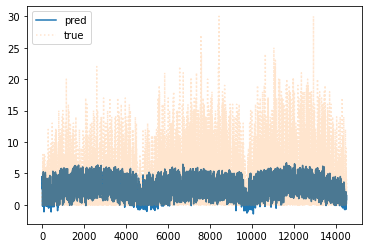

In [42]:
y_pred= model.predict(X_train)
y_true = y_train
x = np.arange(len(y_true))
plt.plot(x, y_pred, label="pred")
plt.plot(x, y_true, ':', label="true", alpha=0.2)
plt.legend()

In [39]:
train_group_data[6100]['X_train']

,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Month,Hour,Day_of_year,...,Thunderstorms,Haze,Heavy Rain Showers,Moderate Drizzle,Blowing Dust,Freezing Drizzle,Freezing Rain,Smoke,Snow Grains,Moderate Snow
0,0.800,-6.800,57.000,2.000,14.000,24.100,102.780,4,2,106,...,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.500,-6.000,62.000,2.000,17.000,24.100,102.780,4,3,106,...,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,0.400,-5.200,66.000,2.000,21.000,24.100,102.820,4,4,106,...,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,-0.300,-5.500,68.000,2.000,18.000,48.300,102.850,4,5,106,...,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,0.200,-5.800,64.000,2.000,21.000,48.300,102.930,4,6,106,...,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,4.200,3.700,97.000,35.000,11.000,4.800,100.460,10,19,304,...,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4905,3.500,3.000,97.000,35.000,10.000,4.800,100.470,10,20,304,...,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4906,3.600,3.200,97.000,33.000,5.000,11.300,100.500,10,21,304,...,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4907,3.300,2.800,97.000,30.000,7.000,12.900,100.640,10,22,304,...,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


# k-NN regression

In [303]:
from sklearn.neighbors import KNeighborsRegressor

d = hour_trips_dict[6100][['Temp (°C)', 'Dew Point Temp (°C)', 'Rel Hum (%)', 'Wind Dir (10s deg)',
                  'Wind Spd (km/h)', 'Visibility (km)', 'Stn Press (kPa)', 'Month', 'Hour', 'Day_of_year', 'hour_trip_count']]

# Data
X_train = d[['Temp (°C)', 'Dew Point Temp (°C)', 'Rel Hum (%)', 'Wind Dir (10s deg)',
                  'Wind Spd (km/h)', 'Visibility (km)', 'Stn Press (kPa)', 'Month', 'Hour', 'Day_of_year']]
y_train = d['hour_trip_count']

# Model
model = KNeighborsRegressor(n_neighbors=2).fit(X_train, y_train)

# Training error
pred = model.predict(X_train)

print(mean_absolute_error(y_train, pred))

2.7488798511063623


In [13]:
models_knnr = {} # Keeps track of the trained model
models_knnr_train_acc = {} # Accuracy on training data
models_knnr_test_acc = {} # Accuracy on test data
models_knnr_val_acc = {} # Accuracy on validation data

n = [1,2,3,4,5,6,7,8,9,10]

with tqdm(total=len(train_group_data)) as pbar:
    for key in train_group_data:
        # Data
        X_train = train_group_data[key]['X_train'].copy()
        y_train = train_group_data[key]['y_train']
        
        
        X_test = test_validation_group_data[key]['X_test'].copy()
        y_test = test_validation_group_data[key]['y_test']
        
        X_val = test_validation_group_data[key]['X_val'].copy()
        y_val = test_validation_group_data[key]['y_val']
        
        models_knnr_train_acc[key] = []
        models_knnr_test_acc[key] = []
        models_knnr_val_acc[key] = []

        for i in n:
            # Model
            model = KNeighborsRegressor(n_neighbors=i, weights='distance').fit(X_train, y_train)
            models_knnr[key] = model

            # Training error
            pred = model.predict(X_train)
            models_knnr_train_acc[key].append(mean_absolute_error(y_train, pred))

            # Validation error
            pred = model.predict(X_val)
            models_knnr_val_acc[key].append(mean_absolute_error(y_val, pred))

            # Testing error
            pred = model.predict(X_test)
            models_knnr_test_acc[key].append(mean_absolute_error(y_test, pred))
        
        pbar.update(1)

100%|██████████| 463/463 [53:07<00:00,  6.88s/it]


In [24]:
pd.DataFrame(models_knnr_test_acc).T.describe()

,0,1,2,3,4,5,6,7,8,9
count,463.000,463.000,463.000,463.000,463.000,463.000,463.000,463.000,463.000,463.000
mean,2.021,1.857,1.791,1.753,1.728,1.711,1.699,1.690,1.683,1.678
std,1.097,0.998,0.962,0.942,0.929,0.919,0.913,0.908,0.904,0.901
min,0.146,0.152,0.151,0.153,0.154,0.154,0.155,0.154,0.155,0.155
25%,1.180,1.091,1.057,1.037,1.023,1.012,1.004,0.999,0.995,0.991
50%,1.836,1.700,1.621,1.583,1.566,1.547,1.544,1.533,1.526,1.524
75%,2.598,2.387,2.317,2.269,2.224,2.199,2.180,2.163,2.160,2.149
max,6.788,6.161,5.949,5.858,5.863,5.831,5.813,5.795,5.795,5.802


In [23]:
pd.DataFrame(models_knnr_train_acc)

,5002,5003,5004,5005,5006,5007,6001,6002,6003,6004,...,6921,6923,6924,6925,6926,6927,6928,6929,6930,10002
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
6,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
7,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
8,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
9,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [20]:
pd.DataFrame(models_knnr_val_acc).T

,0,1,2,3,4,5,6,7,8,9
5002,0.204,0.208,0.202,0.204,0.205,0.206,0.207,0.207,0.208,0.209
5003,0.159,0.158,0.155,0.155,0.155,0.156,0.157,0.158,0.157,0.157
5004,0.220,0.213,0.210,0.212,0.211,0.209,0.208,0.208,0.208,0.208
5005,0.264,0.265,0.260,0.254,0.251,0.249,0.247,0.250,0.249,0.247
5006,0.297,0.295,0.298,0.295,0.298,0.297,0.295,0.296,0.296,0.296
...,...,...,...,...,...,...,...,...,...,...
6927,2.106,1.912,1.837,1.802,1.766,1.738,1.732,1.719,1.712,1.704
6928,1.663,1.552,1.488,1.457,1.433,1.407,1.400,1.400,1.391,1.390
6929,1.373,1.256,1.207,1.183,1.167,1.151,1.144,1.140,1.138,1.136
6930,0.965,0.851,0.822,0.798,0.795,0.793,0.787,0.790,0.791,0.787


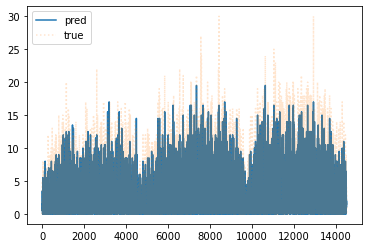

In [11]:
y_pred= model.predict(X_train)
y_true = y_train
x = np.arange(len(y_true))
plt.plot(x, y_pred, label="pred")
plt.plot(x, y_true, ':', label="true", alpha=0.2)
plt.legend()

In [26]:
models_best_knnr = {} # Keeps track of the trained model
models_best_knnr_train_acc = {} # Accuracy on training data
models_best_knnr_test_acc = {} # Accuracy on test data
models_best_knnr_val_acc = {} # Accuracy on validation data

with tqdm(total=len(train_group_data)) as pbar:
    for key in train_group_data:
        # Data
        X_train = train_group_data[key]['X_train'].copy()
        y_train = train_group_data[key]['y_train']
        
        
        X_test = test_validation_group_data[key]['X_test'].copy()
        y_test = test_validation_group_data[key]['y_test']
        
        X_val = test_validation_group_data[key]['X_val'].copy()
        y_val = test_validation_group_data[key]['y_val']

        # Model
        model = KNeighborsRegressor(n_neighbors=10, weights='distance').fit(X_train, y_train)
        models_best_knnr[key] = model

        # Training error
        pred = model.predict(X_train)
        models_best_knnr_train_acc[key] = mean_absolute_error(y_train, pred)

        # Validation error
        pred = model.predict(X_val)
        models_best_knnr_val_acc[key] = mean_absolute_error(y_val, pred)

        # Testing error
        pred = model.predict(X_test)
        models_best_knnr_test_acc[key] = mean_absolute_error(y_test, pred)
        
        pbar.update(1)

100%|██████████| 463/463 [06:32<00:00,  1.18it/s]


In [33]:
pd.DataFrame.from_dict(models_best_knnr_test_acc, orient='index', columns=['Average Testing MAE']).describe()

,Average Testing MAE
count,463.000
mean,1.678
std,0.901
min,0.155
25%,0.991
50%,1.524
75%,2.149
max,5.802


In [35]:
pd.DataFrame.from_dict(models_best_knnr_val_acc , orient='index', columns=['Average Testing MAE']).describe()

,Average Testing MAE
count,463.000
mean,1.676
std,0.900
min,0.157
25%,0.997
50%,1.498
75%,2.115
max,5.842


In [43]:
models_best_knnr = {} # Keeps track of the trained model
models_best_knnr_train_acc = {} # Accuracy on training data
models_best_knnr_test_acc = {} # Accuracy on test data
models_best_knnr_val_acc = {} # Accuracy on validation data

with tqdm(total=len(train_group_data)) as pbar:
    for key in train_group_data:
        # Data
        X_train = train_group_data[key]['X_train'].copy()
        y_train = train_group_data[key]['y_train']
        
        
        X_test = test_validation_group_data[key]['X_test'].copy()
        y_test = test_validation_group_data[key]['y_test']
        
        X_val = test_validation_group_data[key]['X_val'].copy()
        y_val = test_validation_group_data[key]['y_val']

        # Model
        model = KNeighborsRegressor(n_neighbors=5, weights='distance').fit(X_train, y_train)
        models_best_knnr[key] = model

#         # Training error
#         pred = model.predict(X_train)
#         models_best_knnr_train_acc[key] = mean_absolute_error(y_train, pred)

#         # Validation error
#         pred = model.predict(X_val)
#         models_best_knnr_val_acc[key] = mean_absolute_error(y_val, pred)

#         # Testing error
#         pred = model.predict(X_test)
#         models_best_knnr_test_acc[key] = mean_absolute_error(y_test, pred)
        
        pbar.update(1)

100%|██████████| 463/463 [00:09<00:00, 49.49it/s]


In [39]:
pd.DataFrame.from_dict(models_best_knnr_train_acc, orient='index', columns=['MAE']).describe()

,MAE
count,463.000
mean,0.000
std,0.000
min,0.000
25%,0.000
50%,0.000
75%,0.000
max,0.000


# DTC

In [11]:
models_dtr = {} # Keeps track of the trained model
models_dtr_train_acc = {} # Accuracy on training data
models_dtr_test_acc = {} # Accuracy on test data
models_dtr_val_acc = {} # Accuracy on validation data

with tqdm(total=len(train_group_data)) as pbar:
    for key in [6100]:
        # Data
        X_train = train_group_data[key]['X_train']
        y_train = train_group_data[key]['y_train']
        
#         X_test = test_validation_group_data[key]['X_test'].copy().to_numpy()
#         y_test = test_validation_group_data[key]['y_test']
        
#         X_val = test_validation_group_data[key]['X_val'].copy().to_numpy()
#         y_val = test_validation_group_data[key]['y_val']
        
        # Model
        model = DecisionTreeRegressor(max_depth=10).fit(X_train, y_train)
        models_dtr[key] = model
        
#         # Training error
#         pred = model.predict(X_train)
#         models_dtr_train_acc[key] = mean_absolute_error(y_train, pred)

#         # Validation error
#         pred = model.predict(X_val)
#         models_dtr_val_acc[key] = mean_absolute_error(y_val, pred)

#         # Testing error
#         pred = model.predict(X_test)
#         models_dtr_test_acc[key] = mean_absolute_error(y_test, pred)
        

    pbar.update(1)

  0%|          | 1/463 [00:00<00:40, 11.42it/s]


In [13]:
pred = models_dtr[6100].predict(X_train)
models_dtr_train_acc[key] = mean_absolute_error(y_train, pred)

In [14]:
models_dtr_train_acc

{6100: 3.610283669946758}